In [1]:
# data analysis
import numpy as np
import pandas as pd
import sys
import glob
import os,time

# plotting
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [15,12]

import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

# own dataclass
from imp import reload
import coronadataclass as cdc; reload(cdc);

In [2]:
# load data
data     = cdc.CoronaData(download_data = True)


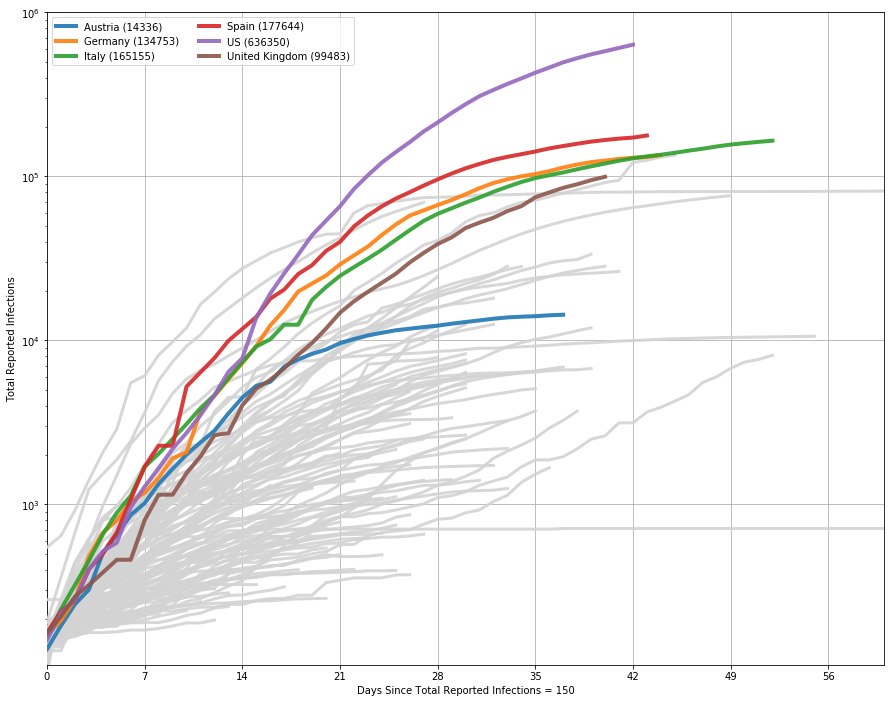

In [3]:
threshold  = 150

colornames       = [cn for cn in matplotlib.colors.TABLEAU_COLORS.keys() if (cn.upper() != 'TAB:WHITE' and cn.upper() != 'TAB:GRAY')]
x                = np.arange(len(data))
fig, ax          = plt.subplots()
scidx            = 0

specialcountries = ['Austria','Italy','Germany','Spain','US', 'United Kingdom']

for country,countrydata in data:
    totinf = np.nan_to_num(countrydata['Confirmed'])
    if totinf[-1] >= threshold:
        startday = np.argmin((totinf-threshold)**2)
        c  = 'lightgray'
        z  = 100
        lw = 3
        lbl = None
        if country in specialcountries:
            c      = colornames[scidx % len(colornames)]
            z      = 101 + scidx
            lw     = 4
            scidx += 1
            lbl    = country + ' ({})'.format(totinf[-1])
        ax.plot(x[:len(totinf[startday:])], totinf[startday:], c = c, zorder = z, lw = lw, alpha = .9, label = lbl)
        #if country in metadata.columns:
        #    for idx, row in metadata.dropna(subset=[country]).iterrows():
        #        days = (pd.to_datetime(row[country])-pd.to_datetime(countrydata.loc[startday,'Date'])).days
        #        ax.annotate(row['measure'], xy=(days, totinf[startday+days]), 
        #                    xytext=(days-0.4,totinf[startday+days]*3), zorder=z, 
        #                    arrowprops={'arrowstyle':'->','color':c, 'linewidth':4})

# exponential plots with doubling time in days
#for doublingtime in np.arange(2,6):
#    ax.plot(x,150 * np.power(2,x/doublingtime), lw = 10, zorder = 80, c = 'black',alpha = .4)

plt.legend(ncol = 2)
plt.xlim([0,60])
ax.xaxis.set_major_locator(MultipleLocator(7))
plt.ylim([threshold*.7,1e6])
plt.xlabel(r'Days Since Total Reported Infections = {}'.format(threshold))
plt.ylabel(r'Total Reported Infections')
plt.yscale('log')
plt.grid()
plt.show()

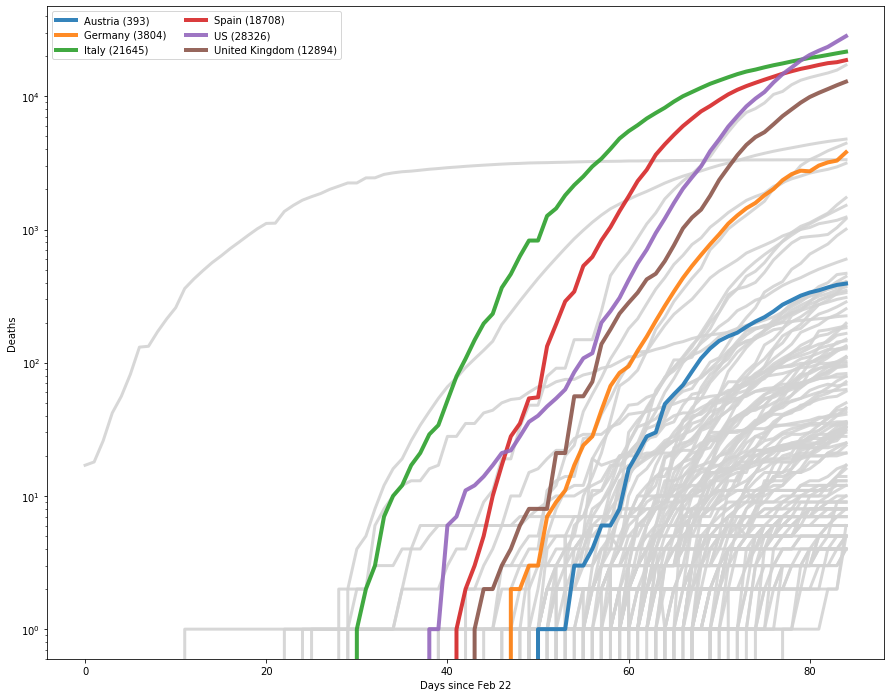

In [4]:
scidx = 0
lgnd = []
fig, ax          = plt.subplots()
dthreshold  = 3
for country,countrydata in data:
    deaths = np.nan_to_num(countrydata['Deaths'])
    if deaths[-1] > dthreshold:
        lgnd.append(country + ' ({:.0f})'.format(deaths[-1]))
        c  = 'lightgray'
        z  = 100
        lw = 3
        lbl = None
        if country in specialcountries:
            c      = colornames[scidx % len(colornames)]
            z      = 101 + scidx
            lw     = 4
            scidx += 1
            lbl    = country + ' ({})'.format(deaths[-1])
        ax.plot(deaths, c = c, zorder = z, lw = lw, alpha = .9, label = lbl)

plt.legend(ncol = 2)
plt.yscale('log')
plt.xlabel(r'Days since Feb 22')
plt.ylabel(r'Deaths')
plt.show()

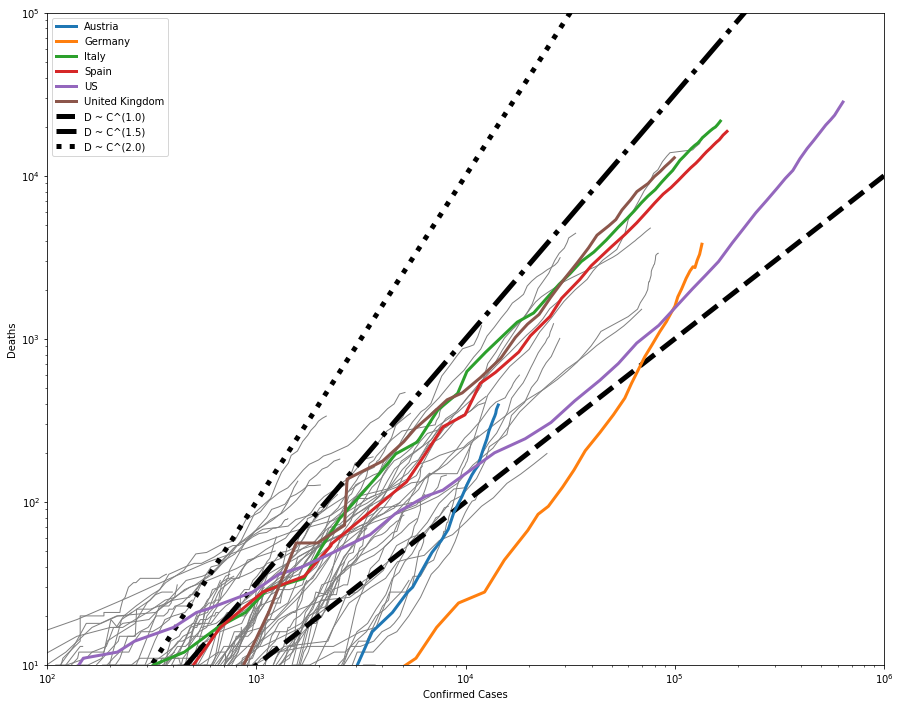

In [5]:
i = 0
for country, cdata in data:
    c = 'gray'
    lw = 1
    zorder = 1
    label = ''
    if country in specialcountries:
        c = colornames[i % len(colornames)]
        lw = 3
        zorder = 100 + i
        label = country
        i+=1
    plt.plot(cdata['Confirmed'],cdata['Deaths'],c = c, lw = lw, zorder = zorder,label = label)

x = np.linspace(1,6,num = 30)    
plt.plot(10**x,10**(1.0*(x-2)), lw = 5, zorder = 20, label = 'D ~ C^(1.0)', c = 'black', linestyle = '--')
plt.plot(10**x,10**(1.5*(x-2)), lw = 5, zorder = 20, label = 'D ~ C^(1.5)', c = 'black', linestyle = '-.')
plt.plot(10**x,10**(2.0*(x-2)), lw = 5, zorder = 20, label = 'D ~ C^(2.0)', c = 'black', linestyle = ':')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.xlim([1e2,1e6])
plt.ylim([1e1,1e5])
plt.xlabel('Confirmed Cases')
plt.ylabel('Deaths')
plt.savefig('confirmed_vs_deaths.pdf')

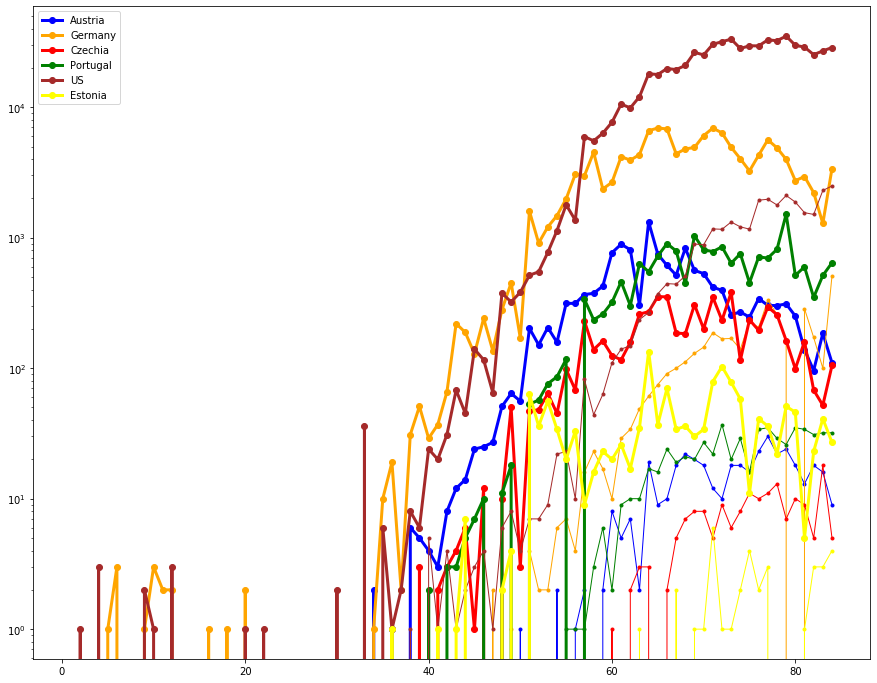

In [6]:
plt.plot(data.Austria['Confirmed'].diff(), marker = 'o', lw = 3, c = 'blue', label = 'Austria')
plt.plot(data.Austria['Deaths'].diff(),    marker = '.', lw = 1, c = 'blue')
plt.plot(data.Germany['Confirmed'].diff(), marker = 'o', lw = 3, c = 'orange', label = 'Germany')
plt.plot(data.Germany['Deaths'].diff(),    marker = '.', lw = 1, c = 'orange')
plt.plot(data.Czechia['Confirmed'].diff(), marker = 'o', lw = 3, c = 'red', label = 'Czechia')
plt.plot(data.Czechia['Deaths'].diff(),    marker = '.', lw = 1, c = 'red')
plt.plot(data.Portugal['Confirmed'].diff(), marker = 'o', lw = 3, c = 'green', label = 'Portugal')
plt.plot(data.Portugal['Deaths'].diff(),    marker = '.', lw = 1, c = 'green')
plt.plot(data.US['Confirmed'].diff(), marker = 'o', lw = 3, c = 'brown', label = 'US')
plt.plot(data.US['Deaths'].diff(),    marker = '.', lw = 1, c = 'brown')
plt.plot(data.Estonia['Confirmed'].diff(), marker = 'o', lw = 3, c = 'yellow', label = 'Estonia')
plt.plot(data.Estonia['Deaths'].diff(),    marker = '.', lw = 1, c = 'yellow')
plt.yscale('log')
plt.legend()
plt.show()